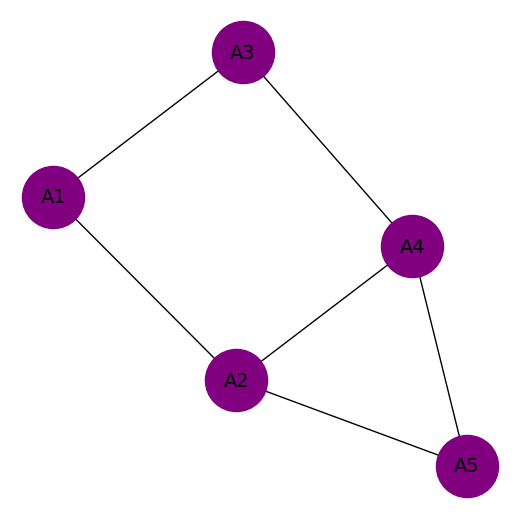

['A1', 'A3']
['A1', 'A2']
['A4', 'A3']
['A4', 'A2', 'A5']


In [ ]:
#ex1

#a

import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import MarkovNetwork

model = MarkovNetwork()
edges = [("A1", "A2"), ("A1", "A3"), ("A2", "A4"), ("A2", "A5"), ("A3", "A4"), ("A4", "A5")]
model.add_edges_from(edges)

G = nx.Graph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

plt.figure(figsize=(5, 5))


In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='purple', node_size=2000, font_size=14)
plt.show()

cliques = list(nx.find_cliques(G))
for c in cliques:
    print(c)


In [11]:
#b

import itertools
import numpy as np

variables = ["A1", "A2", "A3", "A4", "A5"]
states = [-1, 1]

cliques = [
    ['A1', 'A3'], ['A1', 'A2'], ['A4', 'A3'], ['A4', 'A2', 'A5']
]

def phi(clique, assignment):
    exp_sum = sum(int(v[1]) * assignment[v] for v in clique)
    return np.exp(exp_sum)

results = []
for combo in itertools.product(states, repeat=5):
    assign = dict(zip(variables, combo))
    potential = np.prod([phi(c, assign) for c in cliques])
    results.append((assign, potential))

Z = sum(r[1] for r in results)
probs = [(r[0], r[1] / Z) for r in results]

best_state = max(probs, key=lambda x: x[1])
print("Best", best_state[0])
print("Prob", best_state[1])


Best {'A1': 1, 'A2': 1, 'A3': 1, 'A4': 1, 'A5': 1}
Prob 0.9816337633672501
